In [1]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/CNN/Food-11-image-dataset/data.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Food-11-image-dataset/data.zip
replace evaluation/Bread/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
!nvidia-smi

Wed Mar 31 02:31:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
import random
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
class_names = os.listdir('/content/training')

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


How many imgs ? - 5
training
Egg
109.jpg


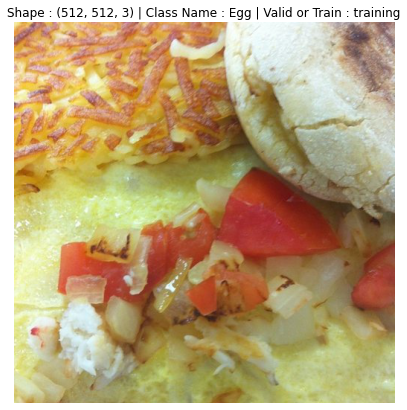

validation
Vegetable-Fruit
4.jpg


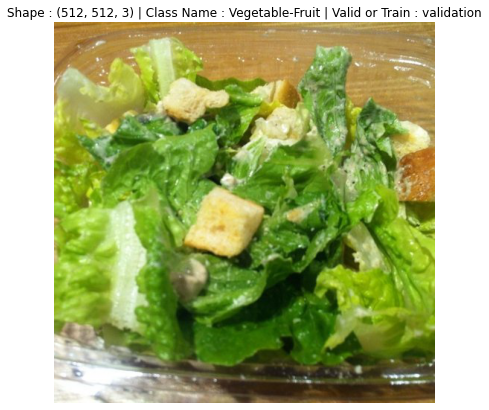

validation
Fried food
264.jpg


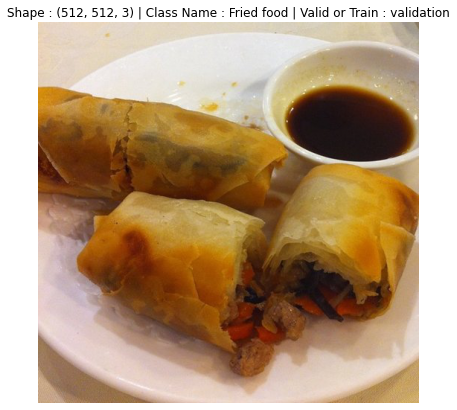

training
Egg
699.jpg


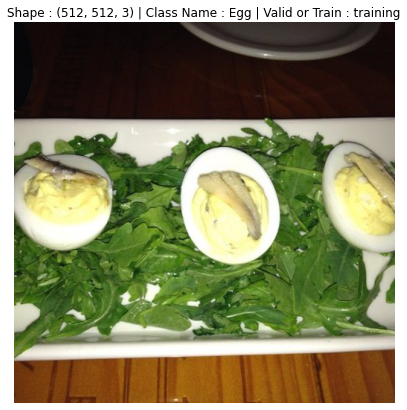

training
Dessert
274.jpg


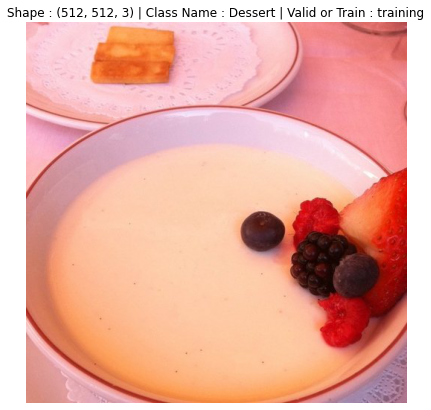

In [6]:
how_many_imgs = int(input('How many imgs ? - '))
for _ in range(how_many_imgs):
  training_of_valid = random.choice(['training','validation'])
  print(training_of_valid)
  type_of_class = random.choice(os.listdir(f'/content/{training_of_valid}'))
  print(type_of_class)
  file_name = random.choice(os.listdir(f'/content/{training_of_valid}/{type_of_class}/'))
  print(file_name)
  img = mpimg.imread(f'/content/{training_of_valid}/{type_of_class}/{file_name}')
  img = img / 255.0
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(f'Shape : {img.shape} | Class Name : {type_of_class} | Valid or Train : {training_of_valid}')
  plt.show();

#Loading the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
train_datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.97,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.50,height_shift_range=0.50,shear_range=0.50,zoom_range=0.50,horizontal_flip=True,vertical_flip=True)
train_data = train_datagen.flow_from_directory('/content/training',target_size=(224,224),subset='training')
test_data = valid_datagen.flow_from_directory('/content/validation',target_size=(224,224))

Found 300 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


# Modelling

In [9]:
!pip3 install wandb
import wandb
from wandb.keras import *

In [10]:
models_to_try = [
    # ['efficentnetb2','https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'],
    # ['efficentnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'],
    # ['efficentnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1'],
    # ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
    # ['efficentnetb4','https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1'],
    # ['efficentnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1'],
    # ['efficentnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1'],
    # ['efficentnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1'],
    # ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    # ['resnet_v1_152','https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/4'],
    # ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    # ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    # ['amiebanet_a_n18_f448','https://tfhub.dev/google/imagenet/amoebanet_a_n18_f448/feature_vector/1'],
    # ['inception_resnet_v2','https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/4'],
    # ['inception_v1','https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4'],
    # ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    # ['nasnet_large','https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4'],
    # ['nasnet_mobile','https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4'],
    # ['mobilenet_v2','https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'],
    # ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
    ['mobilenet_v2_100_224','https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4'],
    ['mobilenet_v2_140_224','https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4'],
    ['mobilenet_v1_100_224','https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/4'],
    ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
    ['pnasnet_large','https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4'],
    ['pnasnet_large','https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4'],
]

In [15]:
# for model_to_try in models_to_try:
#   try:
#     print('-'*100)
#     print(model_to_try)
#     print('-'*100)
#     wandb.init(project="Food-11-Image",name=f"{model_to_try[0]}-tl")
#     model = tf.keras.Sequential([
#       hub.KerasLayer(model_to_try[1],input_shape=(224,224,3)),
#       tf.keras.layers.Dense(len(os.listdir('/content/training')),activation='softmax')
#     ])
#     model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#     model.fit(train_data,validation_data=(test_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
#   except:
#     print('*-*'*100)
#     print(model_to_try)
#     print('*-*'*100)
#     print('It didnt work')

In [12]:
!nvidia-smi

Wed Mar 31 02:51:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    34W / 250W |   8793MiB / 16280MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Results
### val_loss best = mobilenet_v2_140_224
### val_accuracy best = mobilenet_v2_140_224
### accuracy best = resnet50
### loss best = resnet50

In [16]:
# I am going to use mobilenet_v2_140_224 becuaseit is better in val

In [17]:
train_datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.50,height_shift_range=0.50,shear_range=0.50,zoom_range=0.50,horizontal_flip=True,vertical_flip=True)
train_data = train_datagen.flow_from_directory('/content/training',target_size=(224,224))
test_data = valid_datagen.flow_from_directory('/content/validation',target_size=(224,224))

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [19]:
wandb.init(project="Food-11-Image",name=f"big-dog-1")
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",input_shape=(224,224,3)),
  tf.keras.layers.Dense(len(os.listdir('/content/training')),activation='softmax')
])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(test_data),epochs=75,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=2)])
model.save('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Mask-Detection-V3/model.h5')
model.save('/content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/CNN/Mask-Detection-V3/model.h5')

Epoch 1/75
309/309 [==============================] - 190s 607ms/step - loss: 1.2405 - accuracy: 0.5964 - val_loss: 0.9197 - val_accuracy: 0.6950
Epoch 2/75
309/309 [==============================] - 188s 607ms/step - loss: 0.5632 - accuracy: 0.8155 - val_loss: 0.8025 - val_accuracy: 0.7379
Epoch 3/75
309/309 [==============================] - 187s 606ms/step - loss: 0.4940 - accuracy: 0.8308 - val_loss: 0.7825 - val_accuracy: 0.7434
Epoch 4/75
309/309 [==============================] - 186s 604ms/step - loss: 0.4274 - accuracy: 0.8548 - val_loss: 0.7941 - val_accuracy: 0.7493
Epoch 5/75
309/309 [==============================] - 187s 606ms/step - loss: 0.4081 - accuracy: 0.8650 - val_loss: 0.7858 - val_accuracy: 0.7507


In [20]:
class_names

['Dairy product',
 'Soup',
 'Meat',
 'Bread',
 'Rice',
 'Egg',
 'Seafood',
 'Noodles-Pasta',
 'Vegetable-Fruit',
 'Fried food',
 'Dessert']

In [21]:
from keras_preprocessing import image

In [23]:
test_imgs = os.listdir('/content/test/')

In [25]:
import numpy as np